## Table Of Content

### HR Analytics 
- #### [1.1 Load and Sample the data](#part1.1)
- #### [1.2 Build the Model(s)](#part1.2)
    - #### [1.2.1 Decision Tree](#part1.2.1)
    - #### [1.2.2 Random Forest](#part1.2.2)
    - #### [1.2.3 Ada Boost](#part1.2.3)
    - #### [1.2.4 XGBoost](#part1.2.4)
    - #### [1.2.5 Support Vector Machine (SVM)](#part1.2.5)
    - #### [1.2.6 Artificial Neural Network (ANN)](#part1.2.6)
- #### [1.3 Evaluate and Improve the Model(s)](#part1.3)

### Airbnb

- #### [2.1 Load and Sample the data](#part2.1)
- #### [2.2 Build the Model(s)](#part2.2)
    - #### [2.2.1 Decision Tree](#part2.2.1)
    - #### [2.2.2 Random Forest](#part2.2.2)
    - #### [2.2.3 Ada Boost](#part2.2.3)
    - #### [2.2.4 XGBoost](#part2.2.4)
    - #### [2.2.5 Support Vector Machine (SVM)](#part2.2.5)
- #### [2.3 Evaluate and Improve the Model(s)](#part2.3)

In [2]:
# import the required packages

import numpy as np
import pandas as pd

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer

# feature engine
import feature_engine.imputation as mdi
from feature_engine.variable_handling import check_numerical_variables
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler, RobustScaler
from feature_engine.transformation import LogTransformer
from feature_engine.imputation import MeanMedianImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from math import sqrt
from feature_engine.outliers import Winsorizer
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

## 1. HR Analytics

### 1.1 Load and Sample the data<a id="part1.1"></a>

In [5]:
# load data
HR_Analytics = pd.read_csv('hr_data_new.csv')

In [6]:
HR_Analytics.head(10)

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,dept_gender,perf_train,is_promoted
0,1.489047,-0.810439,-0.658785,-0.657159,1.385790,-1.184427,-0.543760,-0.233270,0.982555,-0.270967,0.967590,-0.978541,0.950710,0
1,0.033920,0.925282,-0.658785,1.521702,-0.405022,-0.553129,-1.992079,0.086798,0.982555,-0.270967,-0.482513,0.051615,-0.474096,0
2,1.004005,-1.611541,-0.658785,-0.657159,-0.405022,-0.195822,0.324986,0.791593,0.982555,-0.270967,1.346862,-0.659791,1.323365,1
3,1.004005,-1.745058,-0.658785,1.521702,-0.405022,-0.553129,-0.543760,-1.871918,0.982555,-0.270967,0.233905,1.527795,0.229824,1
4,-0.936165,1.592867,1.545599,1.521702,-0.405022,0.120785,-0.543760,-0.233270,0.982555,-0.270967,-1.149252,-1.424564,-1.129202,1
5,-0.936165,-0.543405,-0.658785,-0.657159,1.385790,-2.270673,-1.992079,-1.140565,-1.017755,-0.270967,-1.149252,0.615210,1.169657,0
6,1.004005,-0.009337,-0.658785,1.521702,-0.405022,0.885852,-0.543760,0.086798,0.982555,-0.270967,0.615437,1.527795,0.604700,0
7,-0.936165,1.459350,-0.658785,-0.657159,-0.405022,0.120785,-0.543760,0.587849,-1.017755,-0.270967,-1.426654,0.615210,1.451984,0
8,-0.936165,-0.009337,1.545599,1.521702,-0.405022,0.120785,-1.992079,-1.140565,-1.017755,-0.270967,-0.039354,-1.424564,0.040053,1
9,1.004005,-0.009337,1.545599,1.521702,-0.405022,0.533412,-0.543760,1.422519,-1.017755,-0.270967,1.294567,1.527795,-1.317552,1


In [7]:
# check for object values

HR_Analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9336 entries, 0 to 9335
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            9336 non-null   float64
 1   region                9336 non-null   float64
 2   education             9336 non-null   float64
 3   gender                9336 non-null   float64
 4   no_of_trainings       9336 non-null   float64
 5   age                   9336 non-null   float64
 6   previous_year_rating  9336 non-null   float64
 7   length_of_service     9336 non-null   float64
 8   KPIs_met >80%         9336 non-null   float64
 9   awards_won?           9336 non-null   float64
 10  avg_training_score    9336 non-null   float64
 11  dept_gender           9336 non-null   float64
 12  perf_train            9336 non-null   float64
 13  is_promoted           9336 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 1021.3 KB


In [8]:
# check for column null values

HR_Analytics.isnull().mean()

department              0.0
region                  0.0
education               0.0
gender                  0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
dept_gender             0.0
perf_train              0.0
is_promoted             0.0
dtype: float64

In [9]:
HR_Analytics.shape

(9336, 14)

### 1.2 Build the Model(s)<a id="part1.2"></a>

### 1. Decision Tree<a id="part1.2.1"></a>

In [12]:
# Set 'is_promoted' as target output and the rest features as model inputs

y_data = HR_Analytics['is_promoted']
X_data = HR_Analytics.drop(['is_promoted'], axis=1)

In [13]:
# Split the data into training and testing data into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7468, 13), (1868, 13), (7468,), (1868,))

In [14]:
from sklearn import tree

In [15]:
# Create Decision Tree Model
decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [16]:
# 0: Not Promoted, 1: Promoted

print(decision_tree.classes_)

[0 1]


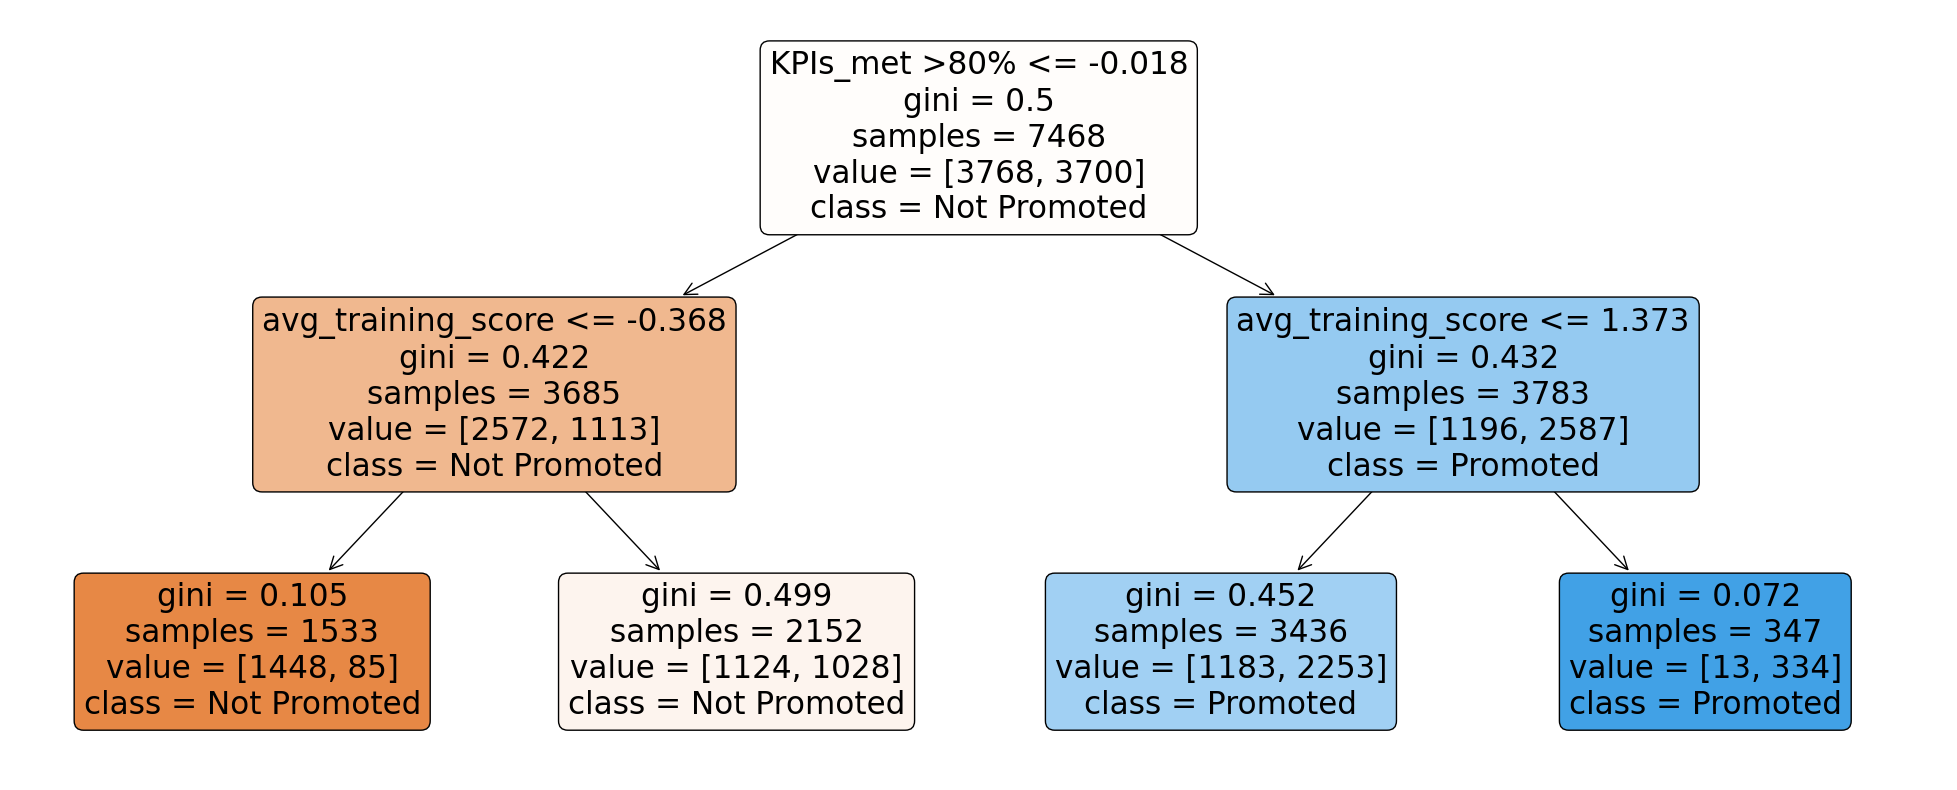

In [17]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(HR_Analytics.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)

plt.savefig('DT1_HR_Analytics.png',format='png')
plt.show()    

In [18]:
#training acc

train_acc = decision_tree.score(X_train, y_train)
print('Training Accuracy: ', train_acc)

Training Accuracy:  0.6908141403320835


In [19]:
#testing acc

test_acc = decision_tree.score(X_test, y_test)
print('Testing Accuracy: ', test_acc)

Testing Accuracy:  0.6879014989293362


#### K-folds Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.69188538 0.68898112 0.68603561 0.69540769 0.68884724]
Test Score:  [0.68361884 0.69523299 0.7070166  0.6695233  0.69576861]


In [22]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Test Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.6902314067580028
CV Test Accuracy:  0.6902320708255294


#### Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_data, y_data) 

print(gs.best_score_)
print(gs.best_params_)

0.8016252745512507
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [26]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 7, min_samples_leaf = 10, min_samples_split =2, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=1)

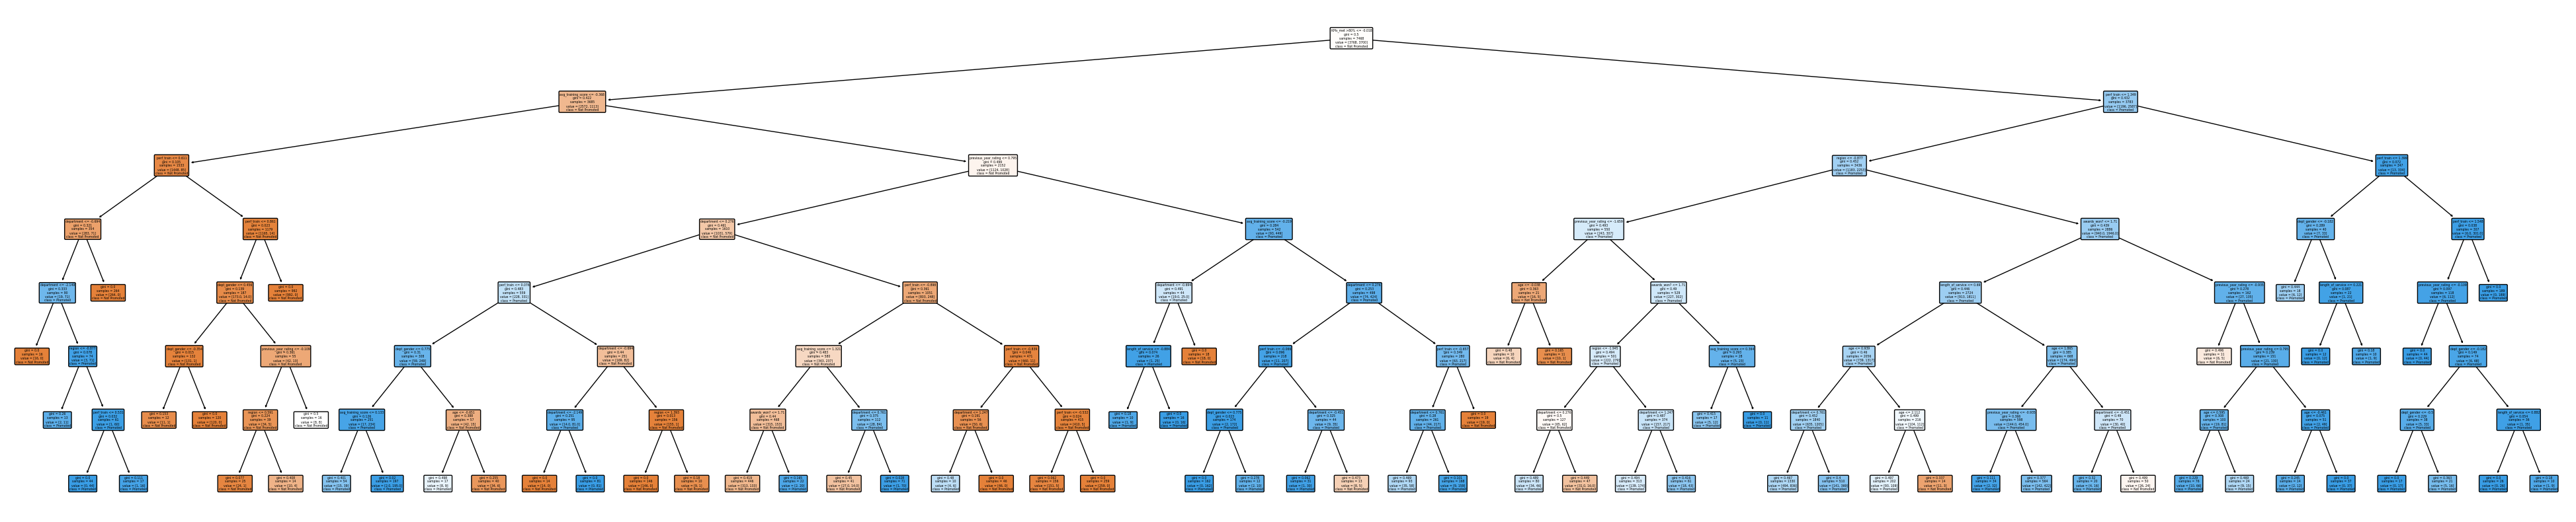

In [27]:
plt.figure(figsize=(50,10))
tree.plot_tree(decision_tree,
              feature_names = list(HR_Analytics.drop(['is_promoted'], axis=1)),
                class_names = ['Not Promoted', 'Promoted'],
                rounded = True,
                filled= True)

plt.savefig('DT2_HR_Analytics.png',format='png')
plt.show()    

In [28]:
#### Evaluate the Model
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('Training Accuracy: ', train_acc)

Training Accuracy:  0.8098553829673273


In [29]:
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('Testing Accuracy: ', test_acc)

Testing Accuracy:  0.8062098501070664


In [30]:
print('***Final Model***')
print('Training acc: ', decision_tree.score(X_train,y_train))
print('Testing acc: ', decision_tree.score(X_test,y_test))

results  = cross_validate(decision_tree, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy:', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training acc:  0.8098553829673273
Testing acc:  0.8062098501070664
CV Training Accuracy: 0.8096617061644478
CV Testing Accuracy: 0.8000212756440327


In [31]:
results  = cross_validate(decision_tree, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.81641671 0.81590574 0.80800643 0.81577186 0.79220779]
Test Score:  [0.80139186 0.80342796 0.81467595 0.78843064 0.79217997]


### 2. Random Forest<a id="part1.2.2"></a>

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_train,y_train)

print("Training Accuracy: ",rf.score(X_train,y_train))
print("Testing Accuracy: ",rf.score(X_test,y_test))

Training Accuracy:  0.7615158007498661
Testing Accuracy:  0.7708779443254818


#### K-folds Cross Validation

In [35]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.76794322 0.76462713 0.76034275 0.76904539 0.76302048]
Test Score:  [0.74946467 0.7702196  0.77825388 0.74397429 0.77825388]


In [36]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Test Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.7649957944363214
CV Test Accuracy:  0.7640332657024002


#### Grid Search

In [38]:
rf = RandomForestClassifier(max_features='sqrt', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8], 
              "min_samples_leaf" : [1, 5, 10], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)

print(gs.best_score_)
print(gs.best_params_)

0.8066630614676867
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}


In [39]:
rf_final = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=8, min_samples_leaf=1, max_features='sqrt', random_state=1, n_jobs=-1)

rf_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=1)

In [40]:
print('***Final Model***')
print('Training Acc: ', rf_final.score(X_train,y_train))
print('Testing Acc: ', rf_final.score(X_test,y_test))

results  = cross_validate(rf_final, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training Acc:  0.8223085163363685
Testing Acc:  0.813169164882227
CV Training Accuracy:  0.8200514743209621
CV Testing Accuracy: 0.8066630614676867


In [41]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, X_data, y_data, scoring.='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.9998661  0.99986611 0.99973223 0.99959834 0.99986611]
Test Score:  [0.79014989 0.80985538 0.80717729 0.79110873 0.80074987]


In [42]:
rf_final = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=8, min_samples_leaf=10, max_features='sqrt', random_state=1, n_jobs=-1)

rf_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=10, n_jobs=-1,
                       random_state=1)

In [43]:
print('***Final Model***')
print('Training Acc: ', rf_final.score(X_train,y_train))
print('Testing Acc: ', rf_final.score(X_test,y_test))

results  = cross_validate(rf_final, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training Acc:  0.8128012854847348
Testing Acc:  0.8142398286937902
CV Training Accuracy:  0.810946896879177
CV Testing Accuracy: 0.8020571425949863


### 3. Ada Boost<a id="part1.2.3"></a>

In [45]:
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators = 20, learning_rate =0.1)
ab.fit(X_train, y_train)

print("Training Accuracy: ",ab.score(X_train,y_train))
print("Testing Accuracy: ",ab.score(X_test,y_test))

Training Accuracy:  0.8053026245313337
Testing Accuracy:  0.8088865096359743


C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### K-Folds Cross Validation

In [47]:
results  = cross_validate(ab, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Score:  [0.77731655 0.77587361 0.77453474 0.79247557 0.79341277]
Test Score:  [0.75642398 0.77932512 0.79325121 0.76861275 0.79217997]


C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [48]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.7827226487227371
CV Testing Accuracy:  0.7779586048224028


#### Grid Search

In [50]:
ab = AdaBoostClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 1.0],  
    'random_state': [0, 42]  
}

gs = GridSearchCV(estimator=ab, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)

print(gs.best_score_)
print(gs.best_params_)

C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.798522461001343
{'learning_rate': 1.0, 'n_estimators': 200, 'random_state': 0}


In [51]:
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators = 200, learning_rate = 1.0, random_state=0)
ab.fit(X_train, y_train)

print("Training Accuracy: ",ab.score(X_train,y_train))
print("Testing Accuracy: ",ab.score(X_test,y_test))

C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy:  0.915104445634708
Testing Accuracy:  0.7703426124197003


In [52]:
print('***Final Model***')
print('Training acc: ', ab.score(X_train,y_train))
print('Testing acc: ', ab.score(X_test,y_test))

results  = cross_validate(ab, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy:', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training acc:  0.915104445634708
Testing acc:  0.7703426124197003


C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\a

CV Training Accuracy: 0.9136943142887406
CV Testing Accuracy: 0.7840617899755589


In [53]:
results  = cross_validate(ab, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\a

Train Score:  [0.91416711 0.91779355 0.90801982 0.91565136 0.91283974]
Test Score:  [0.78319058 0.79807177 0.79432244 0.76272094 0.78200321]


### 4. XGBoost<a id="part1.2.4"></a>

In [55]:
# import XGBClassifier from xgboost package
from xgboost import XGBClassifier 

In [56]:
xgb = XGBClassifier(n_estimators = 20, learning_rate = 0.1, use_label_encoder = False, eval_metric='logloss')
xgb.fit(X_train, y_train)

print("Training Accuracy: ",xgb.score(X_train,y_train))
print("Testing Accuracy: ",xgb.score(X_test,y_test))

Training Accuracy:  0.8252544188537762
Testing Accuracy:  0.8174518201284796


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:25] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#### K-fold Cross Validation

In [58]:
results  = cross_validate(xgb, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:25] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:25] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:25] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:25] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } ar

Train Score:  [0.82257633 0.82085955 0.81684295 0.82260008 0.81804793]
Test Score:  [0.80513919 0.81146224 0.81788966 0.78896626 0.80931976]


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:25] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [59]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.8201853682240101
CV Testing Accuracy:  0.8065554216190364


#### Grid Search

In [61]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [20, 50, 100],  
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 5, 7],  
    'random_state': [0, 42] 
}

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)

print(gs.best_score_)
print(gs.best_params_)

0.8208018451890091
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0}


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:26] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [62]:
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=5, random_state=0, use_label_encoder = False, eval_metric='logloss')
xgb.fit(X_train, y_train)

print("Training Accuracy: ",xgb.score(X_train,y_train))
print("Testing Accuracy: ",xgb.score(X_test,y_test))

Training Accuracy:  0.8533743974290305
Testing Accuracy:  0.8174518201284796


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:26] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [63]:
print('***Final Model***')
print('Training acc: ', xgb.score(X_train,y_train))
print('Testing acc: ', xgb.score(X_test,y_test))

results  = cross_validate(xgb, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy:', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:26] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


***Final Model***
Training acc:  0.8533743974290305
Testing acc:  0.8174518201284796


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CV Training Accuracy: 0.8504713106980375
CV Testing Accuracy: 0.8208018451890091


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [64]:
results  = cross_validate(ab, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\a

Train Score:  [0.91416711 0.91779355 0.90801982 0.91565136 0.91283974]
Test Score:  [0.78319058 0.79807177 0.79432244 0.76272094 0.78200321]


In [65]:
xgb = XGBClassifier(n_estimators = 50, learning_rate = 0.1, max_depth=5, random_state=0, use_label_encoder = False, eval_metric='logloss')
xgb.fit(X_train, y_train)

print("Training Accuracy: ",xgb.score(X_train,y_train))
print("Testing Accuracy: ",xgb.score(X_test,y_test))

Training Accuracy:  0.8302088912694162
Testing Accuracy:  0.815845824411135


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:32] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [66]:
print('***Final Model***')
print('Training acc: ', xgb.score(X_train,y_train))
print('Testing acc: ', xgb.score(X_test,y_test))

results  = cross_validate(xgb, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy:', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training acc:  0.8302088912694162
Testing acc:  0.815845824411135


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:32] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:32] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:32] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:32] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } ar

CV Training Accuracy: 0.8279509385086998
CV Testing Accuracy: 0.8107333043541093


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:41:32] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [67]:
results  = cross_validate(ab, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\a

Train Score:  [0.91416711 0.91779355 0.90801982 0.91565136 0.91283974]
Test Score:  [0.78319058 0.79807177 0.79432244 0.76272094 0.78200321]


### 5. SVM<a id="part1.2.5"></a>

In [69]:
from sklearn.svm import SVC
from sklearn import svm
 
svc_model =  svm.SVC(kernel='linear', gamma = 0.001, C = 0.1)
svc_model.fit(X_train,y_train)
 
print('training accuracy is: ', svc_model.score(X_train,y_train))
print('testing accuracy is: ', svc_model.score(X_test,y_test))

training accuracy is:  0.7451794322442421
testing accuracy is:  0.7441113490364025


#### K-Folds Cross Validation

In [71]:
results  = cross_validate(svc_model, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.74906267 0.74133083 0.7437408  0.74909626 0.74240193]
Test Score:  [0.73447537 0.75147295 0.75629352 0.72737011 0.75093733]


In [72]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV testing Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.7451264978622942
CV testing Accuracy:  0.7441098580209178


#### Grid Search

In [74]:
# Define SVM model
svm_model = SVC()

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient (for non-linear kernels)
}

# Define GridSearchCV
gs_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
gs_svm.fit(X_data, y_data)

# Print best score and parameters
print("Best Accuracy:", gs_svm.best_score_)
print("Best Parameters:", gs_svm.best_params_)


Best Accuracy: 0.793166331952806
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [75]:
svc_model =  svm.SVC(kernel='rbf', gamma = 'scale', C = 10)
svc_model.fit(X_train,y_train)
 
print('training accuracy is: ', svc_model.score(X_train,y_train))
print('testing accuracy is: ', svc_model.score(X_test,y_test))

training accuracy is:  0.8352972683449384
testing accuracy is:  0.7944325481798715


In [76]:
print('***Final Model***')
print('training acc: ', svc_model.score(X_train,y_train))
print('testing acc: ', svc_model.score(X_test,y_test))

results  = cross_validate(svc_model, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV testing Accuracy: ', sum(results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.8352972683449384
testing acc:  0.7944325481798715
CV Training Accuracy:  0.8348596516377675
CV testing Accuracy:  0.793166331952806


In [77]:
results  = cross_validate(svc_model, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.83369041 0.83384657 0.83023162 0.83759539 0.83893426]
Test Score:  [0.79229122 0.80342796 0.8018211  0.77932512 0.78896626]


### 6. ANN<a id="part1.2.6"></a>

In [79]:
from sklearn.neural_network import MLPClassifier

In [80]:
# Set 'is_promoted' as target output and the rest features as model inputs

y_data = HR_Analytics['is_promoted']
X_data = HR_Analytics.drop(['is_promoted'], axis=1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6535, 13), (2801, 13), (6535,), (2801,))

In [82]:
# Create the ann model
mlp = MLPClassifier(activation ='logistic', hidden_layer_sizes=(10,), max_iter= 2000, solver = 'sgd', random_state=2)
# Fit the model to the training set
mlp.fit(X_train,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=2000,
              random_state=2, solver='sgd')

In [83]:
# print out the model coefficients and intercept
print(mlp.coefs_)
print(mlp.intercepts_)

[array([[-0.14692127,  0.11648907, -0.27937687,  0.05815197, -0.14922225,
        -0.2043864 , -0.28954268,  0.18476041, -0.13977373, -0.13274902],
       [ 0.20189299, -0.20066991,  0.08262731, -0.13479805, -0.03416555,
         0.29383911,  0.36461634, -0.19073964,  0.19854643, -0.20188725],
       [-0.01541948, -0.13859622, -0.05531287, -0.20881538, -0.21771825,
         0.04499621, -0.14943052, -0.17099823, -0.17119915, -0.08404916],
       [-0.0296778 , -0.12110815,  0.02575985,  0.0100405 , -0.01682356,
        -0.08077165,  0.14039513,  0.05881286, -0.20161879,  0.11849368],
       [ 0.18170683,  0.11430491,  0.0578511 , -0.00875663, -0.03248513,
        -0.10490066, -0.10817939,  0.20831666,  0.01894366,  0.25688628],
       [-0.0238798 , -0.10505852, -0.11885821,  0.25881432, -0.10302089,
        -0.3161989 , -0.19217243, -0.13173725,  0.28823852,  0.26771145],
       [ 0.30257418, -0.16882956,  0.33663296, -0.34860077,  0.03467399,
         0.15682777,  0.11810872, -0.4400386

In [84]:
# calculated the training accuracy
print('Train Accuracy: ', mlp.score(X_train, y_train))

Train Accuracy:  0.742769701606733


In [85]:
# Calculated the fitted values for training set
y_fitted = mlp.predict(X_train) # returns 0 or 1
y_fitted_prob = mlp.predict_proba(X_train)[:,0] # returns probabilities

In [86]:
print(y_fitted)
print(y_fitted_prob)

[0 0 1 ... 1 0 0]
[0.79750163 0.88912354 0.17523073 ... 0.45297961 0.75359814 0.83355205]


In [87]:
# calculated the testing accuracy
print('Test Accuracy: ',mlp.score(X_test, y_test))

Test Accuracy:  0.7361656551231703


#### Grid Search

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=2000, random_state=2)

param_grid = {
    "activation": ["logistic", "relu"],
    "hidden_layer_sizes": [(5,), (10,), (20,)],
    "max_iter": [200, 2000, 4000],
    "solver": ["sgd", "adam"]
}

gs = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Fit the GridSearchCV object
gs.fit(X_train, y_train)

# Display the best score and parameters
print("Best Score:", gs.best_score_)
print("Best Parameters:", gs.best_params_)

Best Score: 0.7958671106303066
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (5,), 'max_iter': 2000, 'solver': 'adam'}


In [90]:
mlp = MLPClassifier(activation ='relu', hidden_layer_sizes=(5,), max_iter=2000, solver ='adam', random_state = 0)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=2000, random_state=0)

In [91]:
print ('Train Accuracy: ', mlp.score(X_train, y_train))
print ('Test Accuracy: ',mlp.score(X_test, y_test))

Train Accuracy:  0.7909716908951798
Test Accuracy:  0.7829346661906462


In [92]:
print('***Final Model***')
print('Training acc: ', mlp.score(X_train,y_train))
print('Testing acc: ', mlp.score(X_test,y_test))

results  = cross_validate(mlp, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy:', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training acc:  0.7909716908951798
Testing acc:  0.7829346661906462
CV Training Accuracy: 0.7869537455404855
CV Testing Accuracy: 0.7802062533189431


### 1.3 Evaluate and Improve the Model(s)<a id="part1.3"></a>

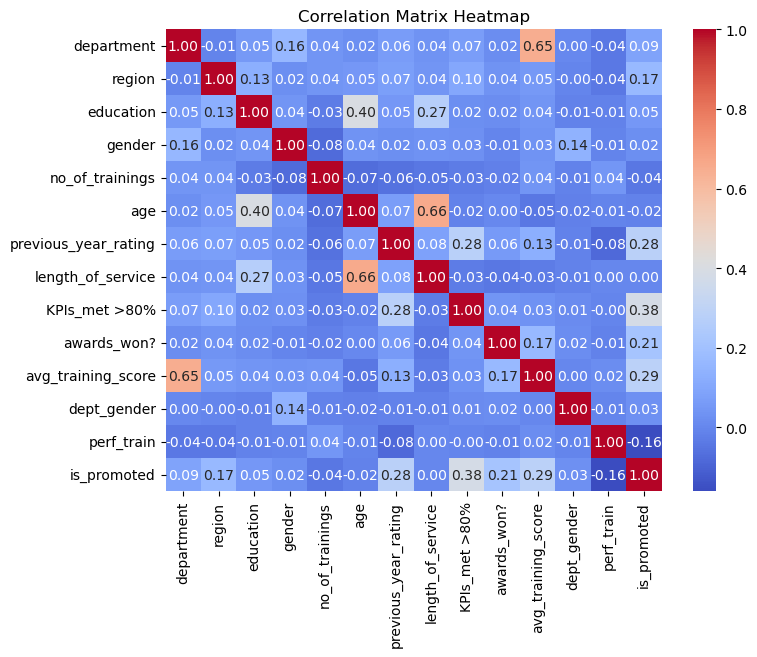

In [94]:
# Compute the correlation matrix
correlation_matrix = HR_Analytics.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [95]:
from scipy.stats import pearsonr

# Initialize an empty dictionary to store p-values
p_values = {}

# Loop through the columns and calculate correlation and p-value with the target
for column in HR_Analytics.columns:
    if column != 'is_promoted':  # Exclude target from the loop
        corr, p_val = pearsonr(HR_Analytics[column], HR_Analytics['is_promoted'])
        p_values[column] = p_val

# Display the p-values
print("P-values for each column (except target):")
for feature, p_val in p_values.items():
    print(f"{feature}: {p_val}")

P-values for each column (except target):
department: 2.5622658226662437e-17
region: 3.013365193021591e-60
education: 7.358667824444568e-07
gender: 0.03853212844083116
no_of_trainings: 1.5441851434955374e-05
age: 0.14538231403197424
previous_year_rating: 1.2374712923782815e-170
length_of_service: 0.9973125225071489
KPIs_met >80%: 2.0389e-319
awards_won?: 1.0615901998994735e-94
avg_training_score: 8.25987772157411e-175
dept_gender: 0.012469306179072978
perf_train: 1.760835150402237e-55


### Drop Column: Education

In [97]:
X_data = X_data.drop('education', axis=1)

In [98]:
# Split the data into training and testing data into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7468, 12), (1868, 12), (7468,), (1868,))

### Random Forest

In [100]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rf.fit(X_train,y_train)

print("Training Accuracy: ",rf.score(X_train,y_train))
print("Testing Accuracy: ",rf.score(X_test,y_test))

Training Accuracy:  0.7640599892876272
Testing Accuracy:  0.7740899357601713


#### K-fold Cross Validation

In [102]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.77048741 0.76476101 0.76261882 0.77132146 0.76663543]
Test Score:  [0.751606   0.76700589 0.78039636 0.74879486 0.78093198]


In [103]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Test Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.7671648276185021
CV Test Accuracy:  0.7657470159618942


#### Grid Search

In [105]:
rf = RandomForestClassifier(max_features='sqrt', random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_depth": [2, 4, 6, 8], 
              "min_samples_leaf" : [1, 5, 10], 
              "n_estimators": [10, 20, 50, 100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)

print(gs.best_score_)
print(gs.best_params_)

0.8073060332221189
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}


In [106]:
rf_final = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=8, min_samples_leaf=1, max_features='sqrt', random_state=1, n_jobs=-1)

rf_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=1)

In [107]:
print('***Final Model***')
print('Training Acc: ', rf_final.score(X_train,y_train))
print('Testing Acc: ', rf_final.score(X_test,y_test))

results  = cross_validate(rf_final, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training Acc:  0.8236475629351901
Testing Acc:  0.8147751605995718
CV Training Accuracy:  0.8210153942490951
CV Testing Accuracy: 0.8073060332221189


In [108]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(rf, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

Train Score:  [0.99959829 0.99959834 0.99973223 0.99959834 0.99959834]
Test Score:  [0.79925054 0.81360471 0.80235672 0.7873594  0.79700054]


#### XGBoost

In [110]:
xgb = XGBClassifier(n_estimators = 20, learning_rate = 0.1, use_label_encoder = False, eval_metric='logloss')
xgb.fit(X_train, y_train)

print("Training Accuracy: ",xgb.score(X_train,y_train))
print("Testing Accuracy: ",xgb.score(X_test,y_test))

Training Accuracy:  0.8252544188537762
Testing Accuracy:  0.8185224839400428


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#### K-Fold Cross Validation

In [112]:
results  = cross_validate(xgb, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:20] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } ar

Train Score:  [0.82230852 0.82032401 0.81697684 0.82313563 0.81871737]
Test Score:  [0.80513919 0.80878415 0.82003214 0.78950187 0.80985538]


In [113]:
print('CV Training Accuracy: ', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(results['test_score'])/len(results['test_score']))

CV Training Accuracy:  0.820292470438247
CV Testing Accuracy:  0.806662545346942


#### Grid Search

In [115]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [20, 50, 100],  
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 5, 7],  
    'random_state': [0, 42] 
}

gs = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

gs = gs.fit(X_data, y_data)

print(gs.best_score_)
print(gs.best_params_)

0.8199449700592621
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 0}


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [116]:
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=5, random_state=0, use_label_encoder = False, eval_metric='logloss')
xgb.fit(X_train, y_train)

print("Training Accuracy: ",xgb.score(X_train,y_train))
print("Testing Accuracy: ",xgb.score(X_test,y_test))

C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy:  0.8532404927691484
Testing Accuracy:  0.8147751605995718


In [117]:
print('***Final Model***')
print('Training acc: ', xgb.score(X_train,y_train))
print('Testing acc: ', xgb.score(X_test,y_test))

results  = cross_validate(xgb, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('CV Training Accuracy:', sum(results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy:', sum(results['test_score'])/len(results['test_score']))

***Final Model***
Training acc:  0.8532404927691484
Testing acc:  0.8147751605995718


C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:22] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } ar

CV Training Accuracy: 0.8504981167292941
CV Testing Accuracy: 0.8199449700592621


In [118]:
results  = cross_validate(ab, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\leong\a

Train Score:  [0.91363149 0.91257196 0.91029589 0.9141786  0.91230419]
Test Score:  [0.77944325 0.7959293  0.79807177 0.76486342 0.77396893]


#### Random Forest + XGBoost

In [120]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

In [121]:
# XGBoost and Random Forest models
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
xgb = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth=5, random_state=0, use_label_encoder = False, eval_metric='logloss')

# Set up Stratified K-Fold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold out-of-sample predictions
rf_pred_train = np.zeros((X_train.shape[0],))
xgb_pred_train = np.zeros((X_train.shape[0],))

# Cross-validation to generate out-of-sample predictions for base models
for train_idx, val_idx in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train the Random Forest model
    rf.fit(X_train_fold, y_train_fold)
    rf_pred_train[val_idx] = rf.predict_proba(X_val_fold)[:, 1] 
    
    # Train the XGBoost model
    xgb.fit(X_train_fold, y_train_fold)
    xgb_pred_train[val_idx] = xgb.predict_proba(X_val_fold)[:, 1] 

meta_features = np.column_stack((rf_pred_train, xgb_pred_train))

C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:29] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:29] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:30] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\leong\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:47:30] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } ar

In [122]:
# Train the meta-model (Logistic Regression)
meta_model = LogisticRegression(random_state=42)
meta_model.fit(meta_features, y_train)

LogisticRegression(random_state=42)

In [123]:
# Generate predictions from base models on the test set
rf_pred_test = rf.predict_proba(X_test)[:, 1]  
xgb_pred_test = xgb.predict_proba(X_test)[:, 1] 

# Stack these predictions to create the input features for the meta-model
meta_features_test = np.column_stack((rf_pred_test, xgb_pred_test))

# Generate final predictions using the meta-model
final_predictions = meta_model.predict(meta_features_test)

# Evaluate the performance of the stacked model
accuracy = accuracy_score(y_test, final_predictions)
print(f"Accuracy of test: ", accuracy)

Accuracy of test:  0.8088865096359743


## 2. Airbnb

### 2.1 Load and Sample the data <a id="part2.1"></a>

In [126]:
# load data
listing = pd.read_csv('listings_new.csv')

In [127]:
listing.head(10)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,no_of_days,year,latitude_longitude,host_active,price
0,-1.593497,-0.826464,-0.407163,0.549530,0.401114,0.280868,0.695633,2.852125,0.094893,-1.679890,-0.637154,-1.117057,-0.810160,0.430032,0.112660,-0.060462,71
1,1.552370,-1.165644,-0.407163,0.549530,-0.006707,0.280868,-1.101592,-0.086847,-1.092318,0.312913,1.450631,1.013292,0.020185,0.430032,-0.001884,-1.584550,49
2,-0.195333,-0.826464,2.082154,1.995573,-0.006707,-2.256345,0.695633,0.280525,0.391696,-1.281329,1.450631,-1.383350,-0.394988,0.430032,0.015134,0.568206,136
3,-0.544874,0.191076,-0.407163,-0.896514,-0.414529,-0.564870,0.695633,-0.454218,-1.092318,0.312913,-1.233664,-1.383350,0.020185,0.430032,0.234155,1.347554,150
4,1.552370,1.208616,-0.407163,1.031544,-1.230172,-0.142001,-1.101592,0.647896,-1.092318,0.312913,-0.637154,0.214411,0.020185,0.430032,0.174685,0.695975,74
5,-1.593497,-1.165644,-0.407163,0.549530,-0.822351,-0.564870,0.695633,-0.454218,1.578907,1.907155,-1.233664,0.214411,-0.810160,0.430032,0.464521,-1.947841,218
6,1.552370,0.869436,-0.407163,-1.378528,1.216757,-2.256345,0.695633,-0.454218,-1.092318,0.312913,1.152376,1.013292,0.020185,0.430032,-2.745424,-1.258761,225
7,-0.544874,0.530256,-0.407163,0.067515,-1.230172,-0.142001,2.133413,-0.454218,-0.498712,-1.679890,0.257611,1.013292,1.680874,-1.069018,0.174685,-0.128474,35
8,-0.894415,-0.826464,2.082154,-0.896514,1.216757,-2.256345,-1.101592,-0.454218,1.578907,0.312913,-1.233664,-0.850763,-0.810160,0.430032,-2.745424,-1.947841,50
9,-0.195333,0.869436,2.082154,1.995573,-0.006707,-2.256345,-1.101592,2.852125,-0.498712,-1.679890,-1.233664,-0.850763,1.265701,-1.069018,0.015134,0.615244,231


In [128]:
# check for object values

listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            7905 non-null   float64
 1   host_name                       7905 non-null   float64
 2   neighbourhood_group             7905 non-null   float64
 3   neighbourhood                   7905 non-null   float64
 4   latitude                        7905 non-null   float64
 5   longitude                       7905 non-null   float64
 6   room_type                       7905 non-null   float64
 7   minimum_nights                  7905 non-null   float64
 8   number_of_reviews               7905 non-null   float64
 9   reviews_per_month               7905 non-null   float64
 10  calculated_host_listings_count  7905 non-null   float64
 11  availability_365                7905 non-null   float64
 12  no_of_days                      79

In [129]:
# check for column null values

listing.isnull().mean()

name                              0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
no_of_days                        0.0
year                              0.0
latitude_longitude                0.0
host_active                       0.0
price                             0.0
dtype: float64

In [130]:
listing.shape

(7905, 17)

### 2.2 Build the Model(s)<a id="part2.2"></a>

### 1. Decision Tree<a id="part2.2.1"></a>

In [133]:
# Set 'price' as target output and the rest features as model inputs

y_data = listing['price']
X_data = listing.drop(['price'], axis=1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6324, 16), (1581, 16), (6324,), (1581,))

In [135]:
# Create Decision Tree Model
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

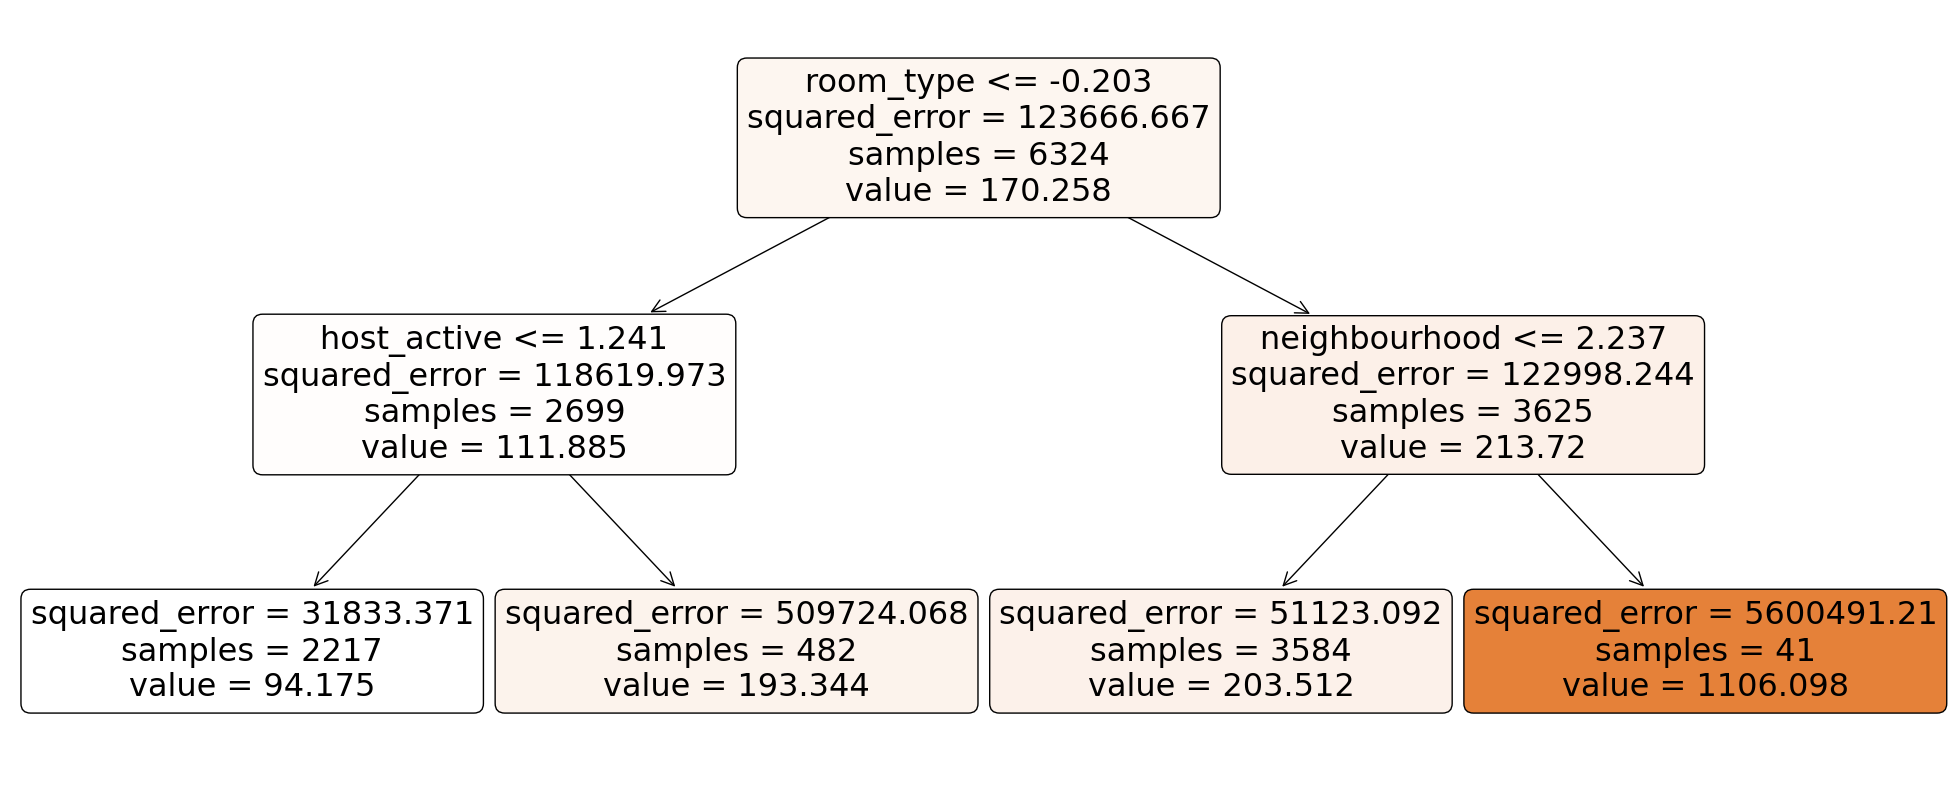

In [136]:
plt.figure(figsize=(25,10))
tree.plot_tree(tree_reg,
               feature_names = list(listing.drop(['price'], axis=1)),
                rounded = True,
                filled= True)
plt.savefig('DT1_listing.png',format='png')
plt.show() 

In [137]:
#training mse

train_mse = mean_squared_error(tree_reg.predict(X_train), y_train)
print('Training MSE: ', train_mse)

Training MSE:  115292.04428258521


In [138]:
#testing mse

test_mse = mean_squared_error(tree_reg.predict(X_test), y_test)
print('Testing MSE: ',test_mse)

Testing MSE:  86672.94854489867


In [139]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = tree_reg.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

test_R2 = tree_reg.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.06771932300646832
testing R^2 value is:  -0.03338227785325243


#### Grid Search

In [141]:
param_grid = { "criterion" : ["squared_error", "absolute_error"], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], 
              'max_depth' : [2,3,4,5,6,7]}
 
gs = GridSearchCV(tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
 
gs = gs.fit(X_train, y_train)
 
print(gs.best_score_)
print(gs.best_params_)

-112441.99421676416
{'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [142]:
tree_reg = tree.DecisionTreeRegressor(criterion='absolute_error', max_depth = 3, min_samples_leaf = 5, min_samples_split=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=5)

In [143]:
#training mse
train_mse = mean_squared_error(tree_reg.predict(X_train), y_train)
print('Training MSE: ', train_mse)
 
#testing mse
test_mse = mean_squared_error(tree_reg.predict(X_test), y_test)
print('Testing MSE: ',test_mse)

Training MSE:  121519.1679316888
Testing MSE:  82005.94180898166


In [144]:
print('***Final Model***')
print('training acc: ', tree_reg.score(X_train,y_train))
print('testing acc: ', tree_reg.score(X_test,y_test))

results  = cross_validate(tree_reg, X_data, y_data, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.01736522366307036
testing acc:  0.022261404893043624
CV Training Accuracy:  113569.74693232132
CV Testing Accuracy:  113579.02672359266


### 2. Random Forest<a id="part2.2.2"></a>

Text(0.5, 0, 'X')

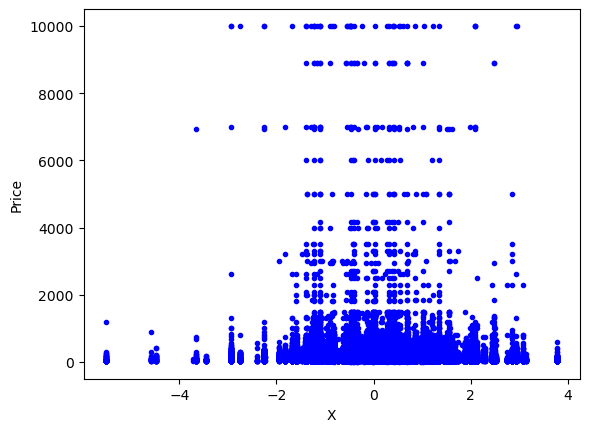

In [146]:
import matplotlib.pyplot as plt
plt.plot(X_data,y_data, 'b.')
plt.ylabel('Price')
plt.xlabel('X')

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(max_depth=2, random_state=1, n_estimators=20)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(X_train, y_train.ravel()) 

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\146237221.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_reg.fit(X_train, y_train.ravel())


RandomForestRegressor(max_depth=2, n_estimators=20, random_state=1)

In [149]:
from sklearn.metrics import mean_squared_error
print('Training MSE: ', mean_squared_error(rf_reg.predict(X_train), y_train))
print('Testing MSE: ', mean_squared_error(rf_reg.predict(X_test), y_test))

Training MSE:  111269.65490384195
Testing MSE:  82990.0480325751


#### K-Folds Cross Validation

In [151]:
results  = cross_validate(rf_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\324416521.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(rf_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)


Train Score:  [-102477.23454877 -107828.27943476 -114309.42198284 -110081.38985259
  -78823.99343704]
Test Score:  [-104997.72726581  -97856.54834657  -59595.72534184  -80336.76253624
 -241891.18658174]


In [152]:
print('CV Training MSE:', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing MSE:', sum(-results['test_score'])/len(results['test_score']))

CV Training MSE: 102704.06385119978
CV Testing MSE: 116935.5900144385


In [153]:
depth_range = range(2,10)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    # Create Random Forest Model
    rf_reg = RandomForestRegressor(max_depth=d,random_state=1, n_estimators=20)
    rf_reg.fit(X_train, y_train.ravel()) 
    train_mse.append(mean_squared_error(rf_reg.predict(X_train), y_train))
    test_mse.append(mean_squared_error(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(rf_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\1972780990.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_reg.fit(X_train, y_train.ravel())
C:\Users\leong\AppData\Local\Temp\ipykernel_19520\1972780990.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(rf_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
C:\Users\leong\AppData\Local\Temp\ipykernel_19520\1972780990.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_reg.fit(X_train, y_train.ravel())
C:\Users\leong\AppData\Local\Temp\ipykernel_19520\1972780990.py:15: FutureWarning: Series.ravel 

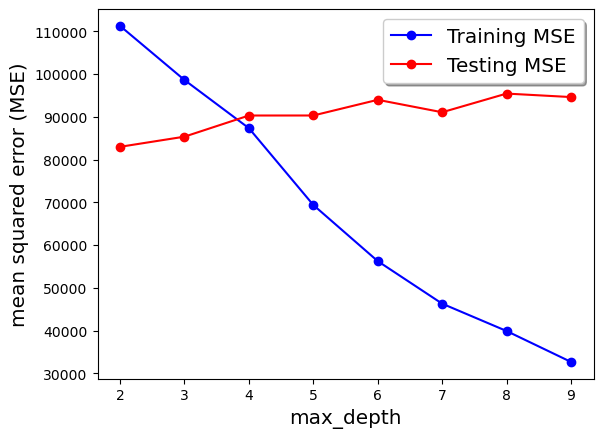

In [154]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='Training MSE')
plt.plot(depth_range, test_mse, 'ro-', label = 'Testing MSE')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

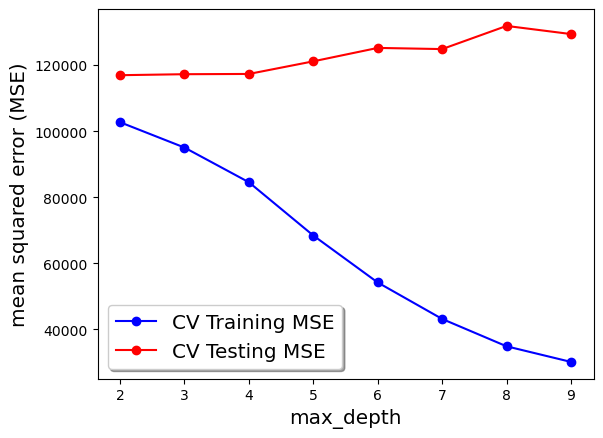

In [155]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='CV Training MSE')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'CV Testing MSE')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='x-large')
plt.show()

In [156]:
print('***Final Model***')
rf_reg_final = RandomForestRegressor(max_depth=4,random_state=1, n_estimators=20)
rf_reg_final.fit(X_train, y_train.ravel()) 
print('Training MSE: ', mean_squared_error(rf_reg_final.predict(X_train), y_train))
print('Testing MSE: ', mean_squared_error(rf_reg_final.predict(X_test), y_test))
    
results  = cross_validate(rf_reg_final, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('CV Training MSE:', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing MSE:', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
Training MSE:  87344.79190114643
Testing MSE:  90310.15868727113


C:\Users\leong\AppData\Local\Temp\ipykernel_19520\2315182181.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_reg_final.fit(X_train, y_train.ravel())
C:\Users\leong\AppData\Local\Temp\ipykernel_19520\2315182181.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(rf_reg_final, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)


CV Training MSE: 84543.16096979786
CV Testing MSE: 117314.5956819258


In [157]:
results  = cross_validate(rf_reg_final, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\3827439943.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(rf_reg_final, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)


Train Score:  [-84264.31192736 -87985.99906556 -92968.49808983 -86548.5344223
 -70948.46134394]
Test Score:  [-102492.14759759  -93427.35846198  -63824.11550959  -84147.45607113
 -242681.90076934]


### 3. Ada Boost<a id="part2.2.3"></a>

In [159]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ab_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=20, learning_rate=0.1)

ab_reg.fit(X_train, y_train)

print("Training R^2 Score: ", ab_reg.score(X_train, y_train))
print("Testing R^2 Score: ", ab_reg.score(X_test, y_test))          

Training R^2 Score:  0.20002494963202122
Testing R^2 Score:  -0.08685416919791189


#### K-Folds Cross Validation

In [161]:
results  = cross_validate(ab_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\1864374946.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(ab_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)


Train Score:  [ -86018.66038204 -100726.04153577 -101359.84229712  -96772.63828157
  -72102.53356607]
Test Score:  [-123635.07239704 -107424.78876883  -72168.13630028  -97872.82069494
 -252339.46519319]


In [162]:
print('CV Training MSE:', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing MSE:', sum(-results['test_score'])/len(results['test_score']))

CV Training MSE: 91395.9432125143
CV Testing MSE: 130688.0566708588


#### Grid Search

In [164]:
depth_range = range(2,10)

train_mse = []
test_mse = []
cross_val_train_mse =[]
cross_val_test_mse =[]

for d in depth_range:
    
    ab_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=d, random_state=1), n_estimators=20)
    
    ab_reg.fit(X_train, y_train.ravel()) 
    train_mse.append(mean_squared_error(rf_reg.predict(X_train), y_train))
    test_mse.append(mean_squared_error(rf_reg.predict(X_test), y_test))
    
    results  = cross_validate(ab_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
    cross_val_train_mse.append(sum(-results['train_score'])/len(results['train_score']))
    cross_val_test_mse.append(sum(-results['test_score'])/len(results['test_score']))

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\2900613017.py:12: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ab_reg.fit(X_train, y_train.ravel())
C:\Users\leong\AppData\Local\Temp\ipykernel_19520\2900613017.py:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(ab_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
C:\Users\leong\AppData\Local\Temp\ipykernel_19520\2900613017.py:12: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ab_reg.fit(X_train, y_train.ravel())
C:\Users\leong\AppData\Local\Temp\ipykernel_19520\2900613017.py:16: FutureWarning: Series.ravel 

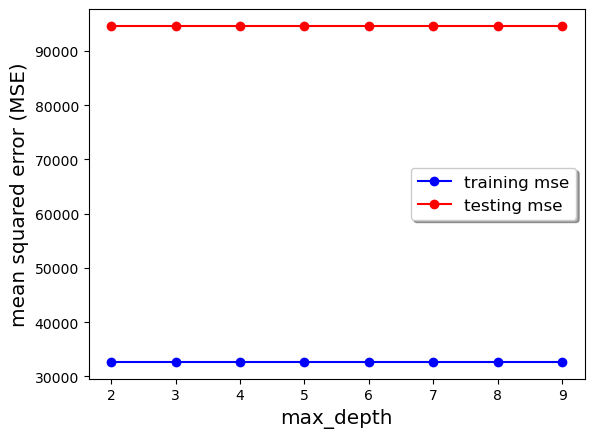

In [165]:
# Plot the simple split measures (train_mse & test_mse) 
plt.plot(depth_range, train_mse, 'bo-', label ='training mse')
plt.plot(depth_range, test_mse, 'ro-', label = 'testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='large')
plt.show()

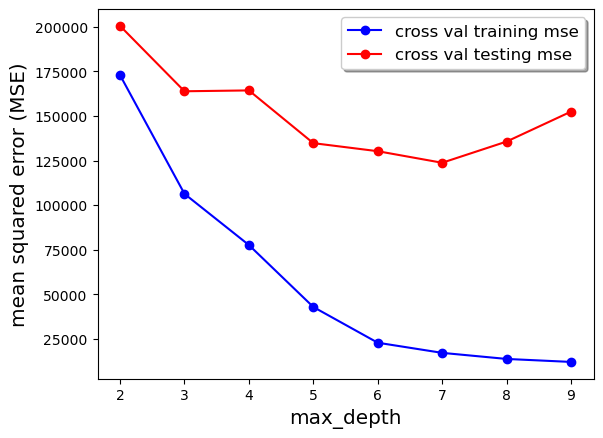

In [166]:
# Plot the cross validation measures (cross_val_train_mse & cross val_test_mse) 
plt.plot(depth_range, cross_val_train_mse, 'bo-', label ='cross val training mse')
plt.plot(depth_range, cross_val_test_mse, 'ro-', label = 'cross val testing mse')

plt.xlabel('max_depth', fontsize='x-large')
plt.ylabel('mean squared error (MSE)', fontsize='x-large')

plt.legend(loc='best', shadow=True, fontsize='large')
plt.show()

In [167]:
ab_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=20, learning_rate=0.1)

ab_reg.fit(X_train, y_train)

print("Training R^2 Score: ", ab_reg.score(X_train, y_train))
print("Testing R^2 Score: ", ab_reg.score(X_test, y_test))          

Training R^2 Score:  0.4409689812006088
Testing R^2 Score:  -0.030402283677532393


In [168]:
print('***Final Model***')
print('training acc: ', ab_reg.score(X_train,y_train))
print('testing acc: ', ab_reg.score(X_test,y_test))

results  = cross_validate(ab_reg, X_data, y_data, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.4409689812006088
testing acc:  -0.030402283677532393
CV Training Accuracy:  69770.43708510972
CV Testing Accuracy:  127996.8097358951


### 4. XGBoost<a id="part2.2.4"></a>

In [170]:
from xgboost import XGBRegressor

In [171]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=1)
xgb_reg.fit(X_train, y_train.ravel())

print("Training Accuracy: ", xgb_reg.score(X_train, y_train))
print("Testing Accuracy: ", xgb_reg.score(X_test, y_test))

Training Accuracy:  0.8015160646954802
Testing Accuracy:  -0.1945764746811307


C:\Users\leong\AppData\Local\Temp\ipykernel_19520\1831187424.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xgb_reg.fit(X_train, y_train.ravel())


#### K-Folds Cross Validation

In [173]:
# Evaluate the Model using K-folds Cross validation
results  = cross_validate(xgb_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('Train Score: ', results['train_score'])
print('Test Score: ', results['test_score'])

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\3608833851.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(xgb_reg, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)


Train Score:  [-23265.98543786 -26733.22368056 -19872.14015072 -17707.60909232
 -18519.3763868 ]
Test Score:  [-136889.51160281 -102011.8468582   -95024.50970508  -90301.00495704
 -226536.80371971]


In [174]:
print('CV Training Accuracy ', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(-results['test_score'])/len(results['test_score']))

CV Training Accuracy  21219.666949651193
CV Testing Accuracy:  130152.73536856892


#### Grid Search

In [176]:
# Define parameter grid for n_estimators
param_grid = {
    'n_estimators': [10, 20, 50, 100, 200, 300]  # Range of estimators to test
}

# Initialize model
xgb_reg = XGBRegressor(max_depth=6, learning_rate=0.1, random_state=1)

# Perform GridSearchCV
gs= GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gs.fit(X_train, y_train.ravel())

# Print results
print(-gs.best_score_)
print(gs.best_params_)

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\3763636451.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  gs.fit(X_train, y_train.ravel())


120017.98919144258
{'n_estimators': 10}


In [177]:
xgb_reg = XGBRegressor(n_estimators=10, learning_rate=0.1, max_depth=6, random_state=1)
xgb_reg.fit(X_train, y_train.ravel())

print("Training Accuracy: ", xgb_reg.score(X_train, y_train))
print("Testing Accuracy: ", xgb_reg.score(X_test, y_test))

Training Accuracy:  0.3845347102723675
Testing Accuracy:  -0.013932529377511438


C:\Users\leong\AppData\Local\Temp\ipykernel_19520\4207054842.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  xgb_reg.fit(X_train, y_train.ravel())


In [178]:
print('***Final Model***')
print('training acc: ', xgb_reg.score(X_train,y_train))
print('testing acc: ', xgb_reg.score(X_test,y_test))

results  = cross_validate(xgb_reg, X_data, y_data, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.3845347102723675
testing acc:  -0.013932529377511438
CV Training Accuracy:  68515.38729869155
CV Testing Accuracy:  116126.6068840153


### 5. SVM<a id="part2.2.5"></a>

In [180]:
svr_model =  svm.SVR(kernel='linear', gamma = 0.001, C = 0.1)
svr_model.fit(X_train,y_train.ravel())
 
print('Training MSE: ', mean_squared_error(svr_model.predict(X_train), y_train))
print('Testing MSE: ', mean_squared_error(svr_model.predict(X_test), y_test))

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\1714122239.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr_model.fit(X_train,y_train.ravel())


Training MSE:  124015.60977535509
Testing MSE:  83623.15706576644


#### K-Folds Cross Validation

In [182]:
results  = cross_validate(svr_model, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('Train: ', results['train_score'])
print('Test: ', results['test_score'])

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\3687317598.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(svr_model, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)


Train:  [-117906.95744462 -123698.80414772 -130762.63320794 -124326.04116342
  -82607.01789058]
Test:  [-107583.22795181  -84560.64791283  -56398.46544306  -81878.98723745
 -249130.94904034]


In [183]:
print('CV Training MSE:', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing MSE:', sum(-results['test_score'])/len(results['test_score']))

CV Training MSE: 115860.29077085717
CV Testing MSE: 115910.45551709857


#### Grid Search

In [185]:
# Define SVM model
svm_model = SVC()

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient (for non-linear kernels)
}

# Define GridSearchCV
gs_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
gs_svm.fit(X_data, y_data.ravel())

# Print best score and parameters
print("Best Accuracy:", gs_svm.best_score_)
print("Best Parameters:", gs_svm.best_params_)

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\3578178879.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  gs_svm.fit(X_data, y_data.ravel())
C:\Users\leong\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Accuracy: 0.13118279569892471
Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [186]:
svr_model =  svm.SVR(kernel='rbf', gamma = 'auto', C = 100)
svr_model.fit(X_train,y_train.ravel())
 
print('Training MSE: ', mean_squared_error(svr_model.predict(X_train), y_train))
print('Testing MSE: ', mean_squared_error(svr_model.predict(X_test), y_test))

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\2936483048.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr_model.fit(X_train,y_train.ravel())


Training MSE:  116725.9486059267
Testing MSE:  79986.29622169308


In [187]:
print('***Final Model***')
print('training acc: ', svr_model.score(X_train,y_train))
print('testing acc: ', svr_model.score(X_test,y_test))

results  = cross_validate(svr_model , X_data, y_data, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.056124409397059205
testing acc:  0.046341189791181625
CV Training Accuracy:  109305.3394352602
CV Testing Accuracy:  110511.73677390162


### 2.3 Evaluate and Improve the Model(s)<a id="part2.3"></a>

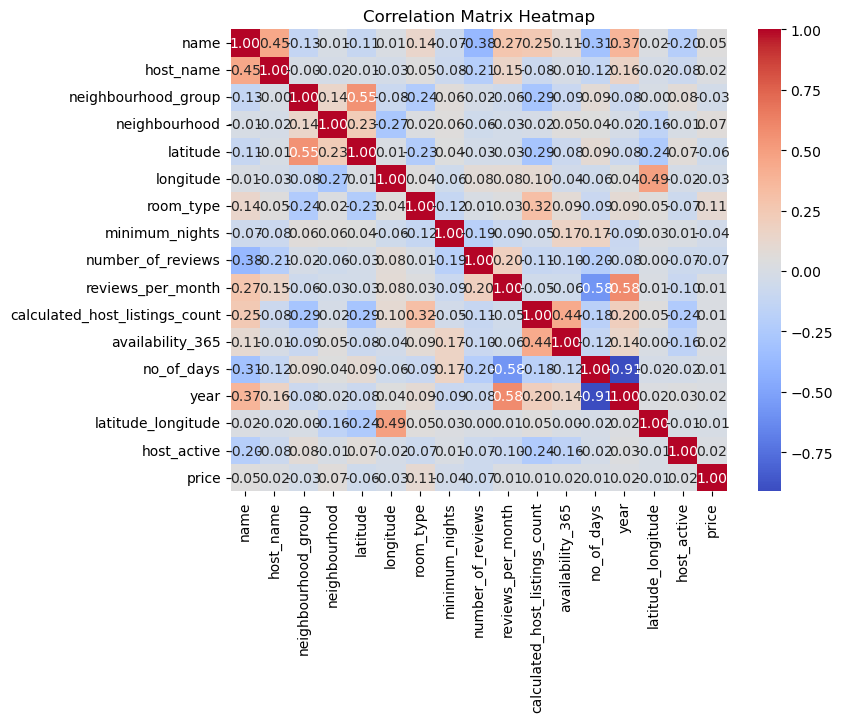

In [202]:
# Compute the correlation matrix
correlation_matrix = listing.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [203]:
from scipy.stats import pearsonr

# Initialize an empty dictionary to store p-values
p_values = {}

# Loop through the columns and calculate correlation and p-value with the target
for column in listing.columns:
    if column != 'price':  # Exclude target from the loop
        corr, p_val = pearsonr(listing[column], listing['price'])
        p_values[column] = p_val

# Display the p-values
print("P-values for each column (except target):")
for feature, p_val in p_values.items():
    print(f"{feature}: {p_val}")

P-values for each column (except target):
name: 1.4652538972657228e-05
host_name: 0.026947857509199823
neighbourhood_group: 0.0052122688976152885
neighbourhood: 5.167036074101018e-09
latitude: 1.3392322344673062e-07
longitude: 0.019095371163858343
room_type: 7.545506422693032e-23
minimum_nights: 0.0002436236497097181
number_of_reviews: 8.272307524165758e-10
reviews_per_month: 0.192136926854121
calculated_host_listings_count: 0.20236446689677098
availability_365: 0.15693613487454908
no_of_days: 0.6529795485468056
year: 0.17707956909311542
latitude_longitude: 0.5560883986464535
host_active: 0.12805251886894595


#### Drop Column: room_type & number_of_reviews

In [205]:
X_data = X_data.drop(['room_type', 'number_of_reviews'], axis=1)

In [206]:
X_data.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,no_of_days,year,latitude_longitude,host_active
0,-1.593497,-0.826464,-0.407163,0.549530,0.401114,0.280868,2.852125,-1.679890,-0.637154,-1.117057,-0.810160,0.430032,0.112660,-0.060462
1,1.552370,-1.165644,-0.407163,0.549530,-0.006707,0.280868,-0.086847,0.312913,1.450631,1.013292,0.020185,0.430032,-0.001884,-1.584550
2,-0.195333,-0.826464,2.082154,1.995573,-0.006707,-2.256345,0.280525,-1.281329,1.450631,-1.383350,-0.394988,0.430032,0.015134,0.568206
3,-0.544874,0.191076,-0.407163,-0.896514,-0.414529,-0.564870,-0.454218,0.312913,-1.233664,-1.383350,0.020185,0.430032,0.234155,1.347554
4,1.552370,1.208616,-0.407163,1.031544,-1.230172,-0.142001,0.647896,0.312913,-0.637154,0.214411,0.020185,0.430032,0.174685,0.695975


In [207]:
# Split the data into training and testing data into 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6324, 14), (1581, 14), (6324,), (1581,))

#### Decision Tree

In [209]:
# Create Decision Tree Model
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2)

In [210]:
train_mse = mean_squared_error(tree_reg.predict(X_train), y_train)
print('Training MSE: ', train_mse)

Training MSE:  108955.26036123496


In [211]:
test_mse = mean_squared_error(tree_reg.predict(X_test), y_test)
print('Testing MSE: ',test_mse)

Testing MSE:  89654.18134617666


#### Grid Search

In [213]:
param_grid = { "criterion" : ["squared_error", "absolute_error"], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 4, 10, 12, 16], 
              'max_depth' : [2,3,4,5,6,7]}
 
gs = GridSearchCV(tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
 
gs = gs.fit(X_train, y_train)
 
print(gs.best_score_)
print(gs.best_params_)

-116775.65630711068
{'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 16}


In [214]:
tree_reg = tree.DecisionTreeRegressor(criterion='absolute_error', max_depth = 3, min_samples_leaf = 5, min_samples_split=16)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=5, min_samples_split=16)

In [215]:
#training mse
train_mse = mean_squared_error(tree_reg.predict(X_train), y_train)
print('Training MSE: ', train_mse)
 
#testing mse
test_mse = mean_squared_error(tree_reg.predict(X_test), y_test)
print('Testing MSE: ',test_mse)

Training MSE:  114611.19038583175
Testing MSE:  85883.79569892473


In [216]:
print('***Final Model***')
print('training acc: ', tree_reg.score(X_train,y_train))
print('testing acc: ', tree_reg.score(X_test,y_test))

results  = cross_validate(tree_reg, X_data, y_data, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.07322488009628114
testing acc:  -0.023973384083768368
CV Training Accuracy:  112624.61208096142
CV Testing Accuracy:  117582.07963314358


### SVM 

In [218]:
svr_model =  svm.SVR(kernel='linear', gamma = 0.001, C = 0.1)
svr_model.fit(X_train,y_train.ravel())
 
print('Training MSE: ', mean_squared_error(svr_model.predict(X_train), y_train))
print('Testing MSE: ', mean_squared_error(svr_model.predict(X_test), y_test))

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\1714122239.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr_model.fit(X_train,y_train.ravel())


Training MSE:  125812.3717165281
Testing MSE:  85487.74236872251


#### K-folds Cross Validation

In [220]:
results  = cross_validate(svr_model, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('Train: ', results['train_score'])
print('Test: ', results['test_score'])

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\3687317598.py:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  results  = cross_validate(svr_model, X_data, y_data.ravel(), scoring='neg_mean_squared_error', cv=5, return_train_score = True)


Train:  [-119816.90185948 -125443.76585319 -132391.82437406 -126395.98881415
  -83923.44870835]
Test:  [-108920.43777707  -85846.52228987  -58298.10036615  -82870.34396021
 -252233.73552899]


In [221]:
print('CV Training MSE:', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing MSE:', sum(-results['test_score'])/len(results['test_score']))

CV Training MSE: 117594.38592184735
CV Testing MSE: 117633.8279844597


#### Grid Search

In [223]:
# Define SVM model
svm_model = SVC()

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Different kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient (for non-linear kernels)
}

# Define GridSearchCV
gs_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model
gs_svm.fit(X_data, y_data.ravel())

# Print best score and parameters
print("Best Accuracy:", gs_svm.best_score_)
print("Best Parameters:", gs_svm.best_params_)

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\3578178879.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  gs_svm.fit(X_data, y_data.ravel())
C:\Users\leong\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Accuracy: 0.12397216951296648
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [224]:
svr_model =  svm.SVR(kernel='rbf', gamma = 'scale', C = 100)
svr_model.fit(X_train,y_train.ravel())
 
print('Training MSE: ', mean_squared_error(svr_model.predict(X_train), y_train))
print('Testing MSE: ', mean_squared_error(svr_model.predict(X_test), y_test))

C:\Users\leong\AppData\Local\Temp\ipykernel_19520\3003281122.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr_model.fit(X_train,y_train.ravel())


Training MSE:  120157.91620842811
Testing MSE:  83115.93185685964


In [225]:
print('***Final Model***')
print('training acc: ', svr_model.score(X_train,y_train))
print('testing acc: ', svr_model.score(X_test,y_test))

results  = cross_validate(svr_model , X_data, y_data, scoring='neg_mean_squared_error', cv=5, return_train_score = True)
print('CV Training Accuracy: ', sum(-results['train_score'])/len(results['train_score']))
print('CV Testing Accuracy: ', sum(-results['test_score'])/len(results['test_score']))

***Final Model***
training acc:  0.028372649943148698
testing acc:  0.009027240562330952
CV Training Accuracy:  112437.56854379892
CV Testing Accuracy:  113838.32190268328


### Decision Tree & SVM

In [227]:
from sklearn import tree, svm
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define the base models
tree_reg = tree.DecisionTreeRegressor(criterion='absolute_error', max_depth=3, min_samples_leaf=5, min_samples_split=16)
svm_reg = svm.SVR(kernel='rbf', gamma='scale', C=100)

# Set up Stratified K-Fold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to hold out-of-sample predictions
tree_train = np.zeros((X_train.shape[0],))
svm_train = np.zeros((X_train.shape[0],))

# Cross-validation to generate out-of-sample predictions for base models
for train_idx, val_idx in kf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train the Decision Tree model
    tree_reg.fit(X_train_fold, y_train_fold)
    tree_train[val_idx] = tree_reg.predict(X_val_fold)  # Use predict, not predict_proba for regression
    
    # Train the SVM model
    svm_reg.fit(X_train_fold, y_train_fold)
    svm_train[val_idx] = svm_reg.predict(X_val_fold)  # Use predict for regression

# Combine base model predictions into a feature matrix for the meta-model
meta_features = np.column_stack((tree_train, svm_train))

C:\Users\leong\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [228]:
from sklearn.linear_model import LinearRegression

# Train the meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(meta_features, y_train)

LinearRegression()

In [229]:
# Generate predictions from base models on the test set
tree_pred_test = tree_reg.predict(X_test)  # Use predict for regression
svm_pred_test = svm_reg.predict(X_test)  # Correctly use predict() for regression

# Stack these predictions to create the input features for the meta-model
meta_features_test = np.column_stack((tree_pred_test, svm_pred_test))

# Generate final predictions using the meta-model
final_predictions = meta_model.predict(meta_features_test)

# Evaluate the performance of the stacked model
from sklearn.metrics import mean_squared_error

# Calculate MSE for both train and test datasets
mse_test = mean_squared_error(y_test, final_predictions)
print(f"Mean Squared Error of test: ", mse_test)

Mean Squared Error of test:  82786.42199746458
